# 1. Historical Model


### Required inputs:
- Soils
- Stage-Storage
- Historical Climate
- Calibration Data


### Results: 
- Model Data
- Timeseries
- Model Parameters

To run, specify the filename of your main_inputs file (allows you to maintain multiple version of the file if desired). 
Make sure you have the entire python repo in the same folder as this notebook file (inputs, results, pondit folders, etc.)


Eagle
Blaney Criddle fit parameters: a =  1.0335239194984869  b =  -0.21317901473225298
[0.05 0.05 2.   1.5  0.1 ] sum squared error:  29.967479529556407
[0.15 0.05 2.   1.5  0.1 ] sum squared error:  36.15147700786113
[0.05 0.15 2.   1.5  0.1 ] sum squared error:  158.88360186245822
[0.05 0.05 2.1  1.5  0.1 ] sum squared error:  33.13985151986003
[0.05 0.05 2.   1.6  0.1 ] sum squared error:  26.19350301433473
[0.05 0.05 2.   1.5  0.2 ] sum squared error:  38.32313163762498
[0. 0. 1. 2. 0.] sum squared error:  34.05317681076359
[0.02578219 0.02578219 1.51564382 1.74217809 0.05156438] sum squared error:  25.2271156177081
[0.0368757  0.0368757  1.73751402 1.63124299 0.0737514 ] sum squared error:  27.89117029147999
[0.04300014 0.04300014 1.8600028  1.5699986  0.08600028] sum squared error:  29.619932199661058
[0.04643001 0.04643001 1.92860019 1.53569991 0.09286002] sum squared error:  30.1334924618747
[0.04824722 0.04824722 1.96494443 1.51752778 0.09649444] sum squared error:  30.011780

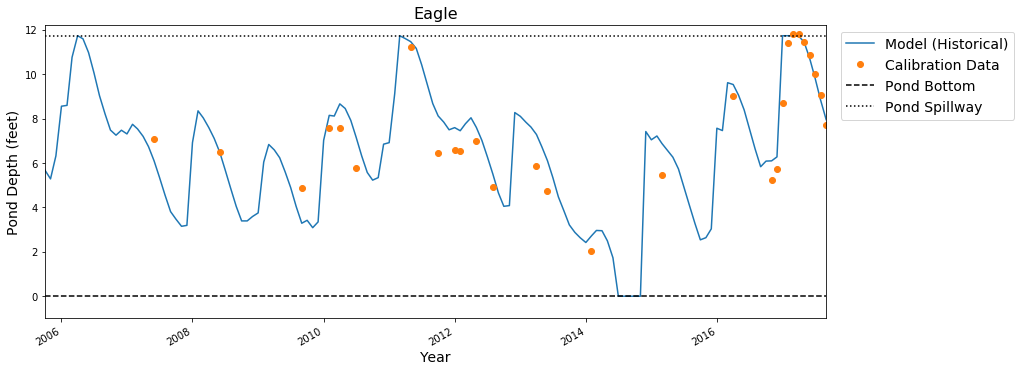

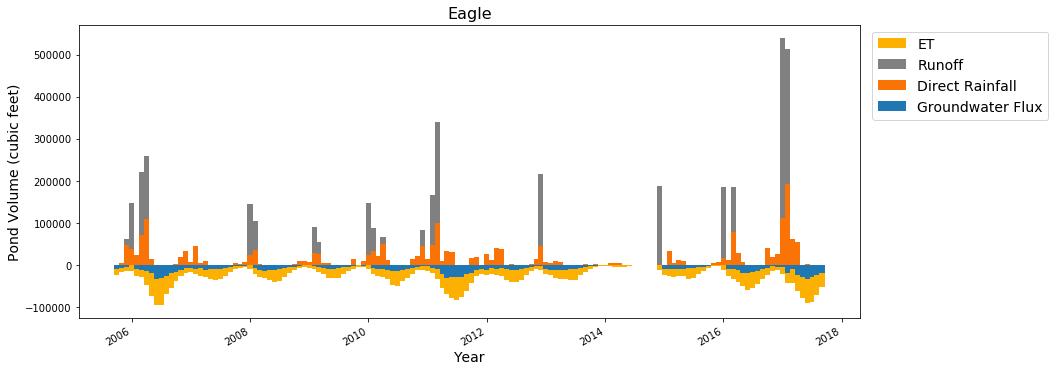

In [1]:

################### user inputs ###############################


## specify the input filename of the main_inputs file; do not include file extension
master_input_filename = 'main_inputs'





###############################################################
repo_folder = './'  

import os
os.chdir(repo_folder)
import importlib

from pondit.load_data import *
from pondit.calc_ET import *
from pondit.calc_model import *
from pondit.plot_model import *

import pandas
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

folder_in = repo_folder + '/inputs/'
folder_out = repo_folder + '/results/'

### load input data common to all sites
scalars = pandas.read_csv(folder_in + master_input_filename + '.csv', index_col=0)

site_list = scalars.index
site_list = scalars.loc[scalars['status'] != 'done', :].index


for site in site_list:
    sws_calc_dict = {}
    print(site)
    ## load data
    stage_storage, soils, data_hist, last_hist_date, calib_data = load_data(scalars, site, folder_in)

    
    bc_calc = calc_ET(data_hist, scalars, site, repo_folder)

    sws_calc, out, scalars_out = calc_pondit(bc_calc, scalars, site, stage_storage, soils, repo_folder, calib_data)
    sws_calc.to_csv(folder_out + '/data/1_hist_model/'+ site + '_data_hist.csv')
    scalars_out.to_csv(folder_out + 'data/1_hist_model/' + site + '_model_params_hist.csv')
    plot_model(sws_calc, scalars, site, folder_out)
        

